## fits 파일 시각화

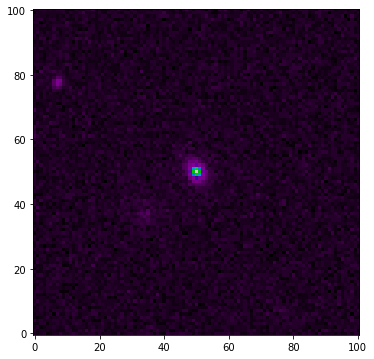

In [23]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
place_p = "/Users/munpyeong-an/Documents/학교/1학기/CRA 방학프로젝트/방학 전 계획/수집 폴더/데이터셋/SpaceBasedTraining/Data.1/Public/Band1/imageEUC_VIS-100015.fits"
place_d = "D:\\GLC_dataset\\train\\Data.0\\Data.0\\Private\Band1\\NoLensImage\\imageEUC_VIS-100002.fits"
hdulist = fits.open(place_p)
data = hdulist[0].data
header = hdulist[0].header

graph = np.array(data, dtype=np.float32)

max_value = np.percentile(graph, 99.8)
min_value = np.percentile(graph, 10)

plt.figure(figsize=(8,6))
image_matplotlib = plt.imshow(graph, cmap='nipy_spectral', origin='lower') #vmax=max_value, vmin=min_value, 
plt.show()

In [5]:
header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                  -32 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                  101 / length of data axis 1                          
NAXIS2  =                  101 / length of data axis 2                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
WCSAXES =                    2 / number of World Coordinate System axes         
CRPIX1  =                  51. / x-coordinate of reference pixel                
CRPIX2  =                  51. / y-coordinate of reference pixel                
CRVAL1  =                   0. / first axis value at reference pixel            
CRVAL2  =                   

In [11]:
graph[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

# 데이터 병합

In [7]:
from astropy.table import Table
import astropy.io.fits as fits
import numpy as np

# loads the catalog
cat_p = Table.read('/Users/munpyeong-an/Documents/학교/1학기/CRA 방학프로젝트/방학 전 계획/수집 폴더/데이터셋/SpaceBasedTraining/classifications.csv')
#cat_d = Table.read("D:\\GLC_dataset\\train\\classifications.csv")
ims = np.zeros((20000, 101, 101))

file_p1 = '/Users/munpyeong-an/Documents/학교/1학기/CRA 방학프로젝트/방학 전 계획/수집 폴더/데이터셋/SpaceBasedTraining/Data.0/Public/Band1/imageEUC_VIS-'
file_p2 =  '/Users/munpyeong-an/Documents/학교/1학기/CRA 방학프로젝트/방학 전 계획/수집 폴더/데이터셋/SpaceBasedTraining/Data.1/Public/Band1/imageEUC_VIS-'
file_d1 = "D:\\GLC_dataset\\train\\Data.0\\Data.0\\Private\Band1\\NoLensImage\\imageEUC_VIS-"
file_d2 = "D:\\GLC_dataset\\train\\Data.1\\Data.1\\Private\Band1\\NoLensImage\\imageEUC_VIS-"
# loads the images
'''for i, id in enumerate(cat_d['ID']):
  try:
    ims = fits.open(file_d1+str(id)+'.fits')
    data = ims[0].data
    d_array[i] = np.array(data)
  except IOError:
    ims = fits.open(file_d2+str(id)+'.fits')
    data = ims[0].data
    d_array[i] = np.array(data)'''

for i, id in enumerate(cat_p['ID']):
  try:
    ims[i] = fits.getdata(file_p1+str(id)+'.fits')
  except IOError:
    ims[i] = fits.getdata(file_p2+str(id)+'.fits')

In [8]:
# Concatenate images to catalog
cat_p['image'] = ims

cat_p

ID,is_lens,Einstein_area,numb_pix_lensed_image,flux_lensed_image_in_sigma,"image [101,101]"
int64,int64,float64,int64,float64,float64
100000,1,8.63376e-10,171,195.429,2.0381672695066189e-13 .. 3.9801484590790137e-13
100001,1,1.31789e-10,294,855.589,-4.862435866274939e-13 .. -4.790951164436452e-13
100002,1,4.87725e-12,140,486.113,-7.162225998912086e-13 .. 1.0674348774677989e-12
100003,1,1.44016e-09,1500,10467.4,-5.16303742380958e-13 .. -3.085414410942955e-14
100004,0,2.19735e-11,0,0.0,-3.130112813908015e-13 .. 5.637073923966951e-13
100005,0,2.80493e-10,0,0.0,7.539938725459328e-13 .. 4.934640308949367e-15
100006,0,2.26143e-10,0,0.0,-2.3574751092242385e-13 .. -3.387090412830529e-13
100007,1,1.46681e-10,213,829.363,1.199263778561832e-12 .. -1.6258565674331926e-13
100008,1,5.51284e-11,812,9446.66,1.2610338120944142e-12 .. -1.1786153108171715e-13


In [11]:
cat_p.remove_columns(['Einstein_area', 'numb_pix_lensed_image', 'flux_lensed_image_in_sigma'])

cat_p.write('catalogs_f.hdf5', append=True)

/Users/munpyeong-an/opt/anaconda3/envs/tensorflow-dev/lib/python3.7/site-packages/astropy/io/misc/hdf5.py:283: UserWarning: table path was not set via the path= argument; using default path __astropy_table__
  "using default path {}".format(path))


In [12]:
from astropy.table import Table

# Loads the table created in the previous section
d = Table.read('catalogs_f.hdf5')

In [13]:
x = np.array(d['image'][:16000]).reshape((-1, 101, 101, 1))
y = np.array(d['is_lens'][:16000]).reshape((-1, 1))

#xval = np.array(d['image'][15000:]).reshape((-1, 101, 101, 1))
#yval = np.array(d['is_lens'][15000:]).reshape((-1, 1))

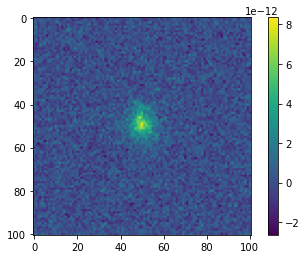

In [18]:
import matplotlib.pyplot as plt

im = x[1030]
plt.imshow(im) 
plt.colorbar()

# 모델

In [76]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(101, 101, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))

In [77]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_42 (Conv2D)           (None, 101, 101, 32)      320       
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 48, 48, 64)        18496     
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 22, 22, 64)        36928     
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 9, 9, 64)         

In [79]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(x, y, epochs=3)

Train on 20000 samples
Epoch 1/3
20000/20000 [==============================] - 111s 6ms/sample - loss: 0.6138 - accuracy: 0.6984
Epoch 2/3
   96/20000 [..............................] - ETA: 1:46 - loss: 0.6104 - accuracy: 0.7031

KeyboardInterrupt: 